# Διαμόρφωση ΑΜ

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (20,3)
matplotlib.rcParams["text.usetex"]
matplotlib.rcParams['mathtext.fontset'] = 'cm'
legend_properties = {'weight':'bold'}

## Το σήμα πληροφορίας
Έστω ότι το σήμα πληροφορίας είναι το σήμα:

$ m(t) = 2 \cdot cos(2\pi f_m \cdot t) $ 

με συχνότητα $ f_m = 0.125 $ Hz και πλάτος $ a = 2 $ 

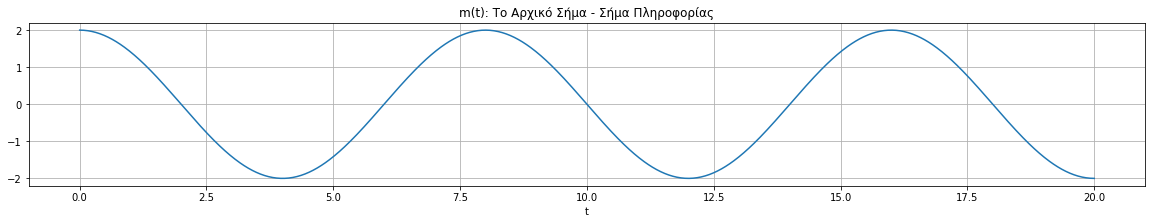

In [71]:
fm = 0.125
a = 2

t = np.linspace(0,20, 1000)
m = lambda t: a*np.cos(2*np.pi*fm*t)
plt.plot(t, m(t))
plt.grid()
plt.title('m(t): Το Αρχικό Σήμα - Σήμα Πληροφορίας')
plt.xlabel('t')
plt.show()

## Το σήμα του φέροντος
Θεωρούμε σήμα φέροντος

$ c(t) = 4 \cdot cos(2\pi f_c \cdot t) $

με συχνότητα $ f_c = 2 $ Hz

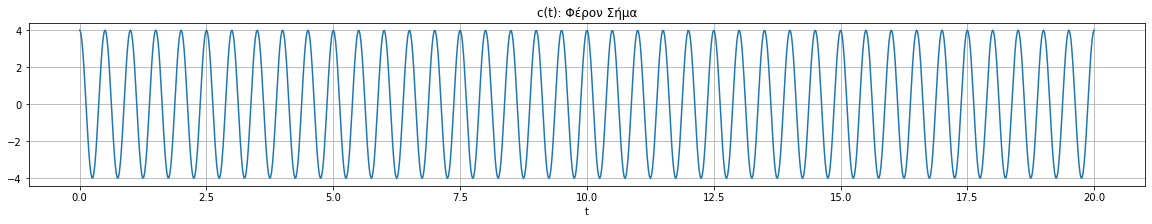

In [72]:
Ac = 4
fc = 2

c = lambda t:Ac*np.cos(2*np.pi*fc*t)
plt.plot(t, c(t))
plt.grid()
plt.title('c(t): Φέρον Σήμα')
plt.xlabel('t')
plt.show()

## Διαμορφωμένο σήμα
Το διαμορφωμένο σήμα δίνεται από τον τύπο:

$ x(t) = [A_c + m(t)] \cdot cos(2 \pi f_c \cdot t) $

Στο παράδειγμά μας θα είναι: 

$ x(t) = [2 + 2 \cdot cos(2\pi\cdot0.125\cdot t)] \cdot cos(2 \pi \cdot 2 \cdot t) $

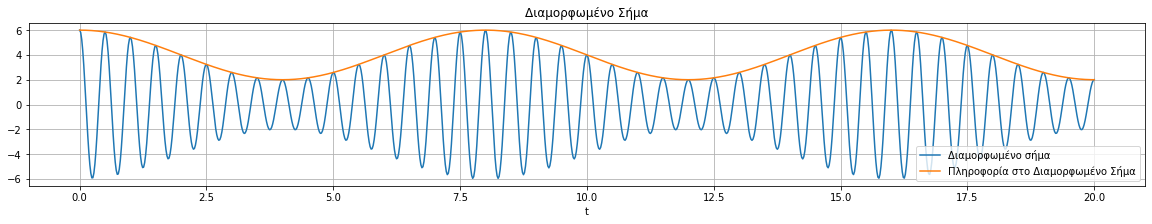

In [73]:
x = lambda t:(Ac+m(t))*np.cos(2*np.pi*fc*t)
plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, m(t)+Ac, label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

## Δείκτης διαμόρφωσης
Ως δείκτη διαμόρφωσης (modulation index) ορίζουμε το 

$ μ = \frac{|min(m(t))|}{A_c} $

Η υπερδιαμόρφωση αφορά το φαινόμενο στο οποίο έχουμε παραμόρφωση της περιβάλλουσας, με αποτέλεσμα να χάνεται το σήμα πληροφορίας. Για να αποφευχθεί η υπερδιαμόρφωση (overmodulation), θα πρέπει $ μ \le 1 $

In [74]:
#modulation index μ
m_min = abs(min(m(t)))
modulationIndex_init = m_min/Ac
print('Μodulation index used above:', str(modulationIndex_init), '< 1')

Μodulation index used above: 0.5 < 1


## Υπερδιαμόρφωση
Μεταβάλλουμε το πλάτος του φέροντος, ώστε να προκαλέσουμε υπερδιαμόρφωση. Τα νέα δεδομένα τυπώνονται παρακάτω.

In [75]:
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 1
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

Initial Ac: 4 with modulation index: 0.5
New Ac: 1 with modulation index: 2.0


### Για μ > 1
Όπως φαίνεται στο παρακάτω γράφημα, η περιβάλλουσα δεν διατηρεί τα δεδομένα του αρχικού σήματος

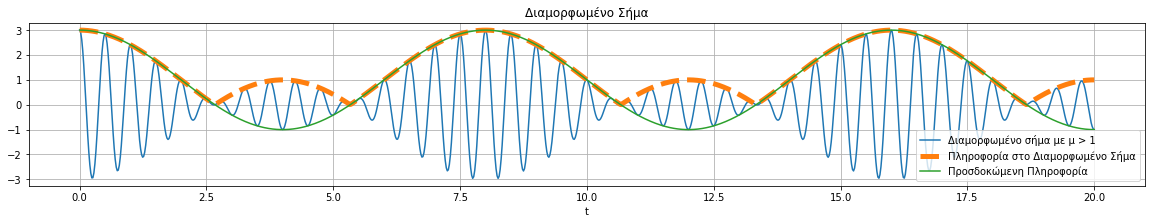

In [76]:
x_overmod = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
plt.plot(t, x_overmod(t), label = 'Διαμορφωμένο σήμα με μ > 1')
plt.plot(t, abs(m(t)+Ac_new), label = 'Πληροφορία στο Διαμορφωμένο Σήμα', lw = 5, ls = '--')
plt.plot(t, m(t)+Ac_new, label = 'Προσδοκώμενη Πληροφορία')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

### Για μ < 1
Αν το μ προκύψει $ \le $ 1, δεν υπάρχει απώλεια πληροφορίας, όπως φαίνεται παρακάτω:

In [77]:
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 6
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

Initial Ac: 4 with modulation index: 0.5
New Ac: 6 with modulation index: 0.3333333333333333


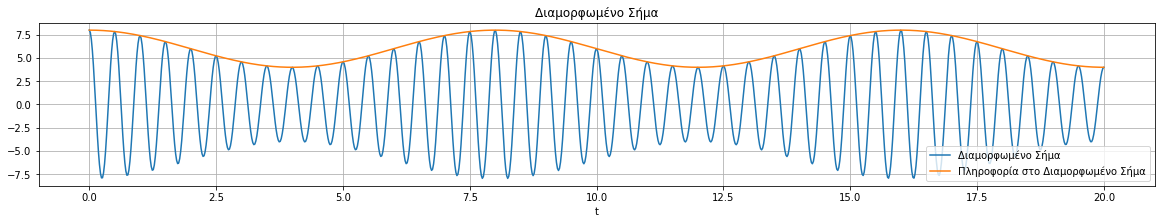

In [78]:
x_new = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
# plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, x_new(t), label = 'Διαμορφωμένο Σήμα')
plt.plot(t, m(t)+Ac_new, label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

### Στην οριακή περίπτωση για μ = 1

In [79]:
modulationIndex = m_min/Ac
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 2
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

Initial Ac: 4 with modulation index: 0.5
New Ac: 2 with modulation index: 1.0


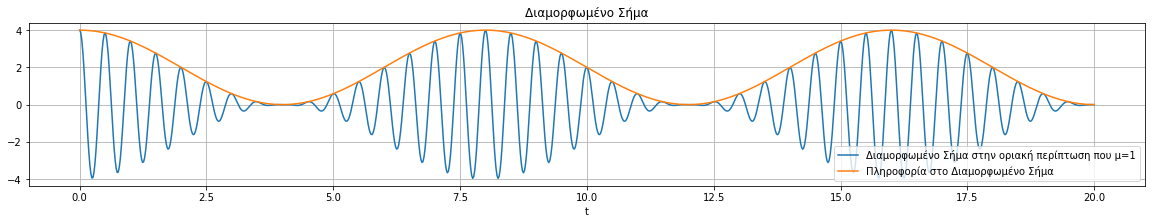

In [80]:
x_new = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
# plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, x_new(t), label = 'Διαμορφωμένο Σήμα στην οριακή περίπτωση που μ=1')
plt.plot(t, m(t)+Ac_new, label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

## Σύνοψη

* Σήμα πληροφορίας:     &emsp;  $ m(t) = 2 \cdot cos(0.25 \pi \cdot t) $ 
* Φέρον Σήμα:           &emsp;  $ c(t) = 4 \cdot cos(4 \pi \cdot t) $
* Διαμορφωμένο Σήμα:    &emsp;  $ x(t) = [2 + 2 \cdot cos(0.25 \pi \cdot t)] \cdot cos(4 \pi \cdot t) $

### Μετασχηματισμοί Fourier
Εκτελούμε τους μετασχηματισμούς Fourier για τα τρία παραπάνω σήματα και προκύπτουν τα εξής:

$ M(ω) = 2 \pi(δ(ω - 0.25\pi) + δ(ω + 0.25\pi)) $

$ C(ω) = 4 \pi(δ(ω - 4\pi) + δ(ω + 4\pi)) $

$ X(ω) = 2 \pi(δ(ω - 4\pi) + δ(ω + 4\pi)) +  \pi(δ(ω - 17\pi/4) + δ(ω + 17\pi/4)) + \pi(δ(ω - 15\pi/4) + δ(ω + 15\pi/4)) $

Οι γραφικές παραστάσεις των παραπάνω φαίνονται παρακάτω:

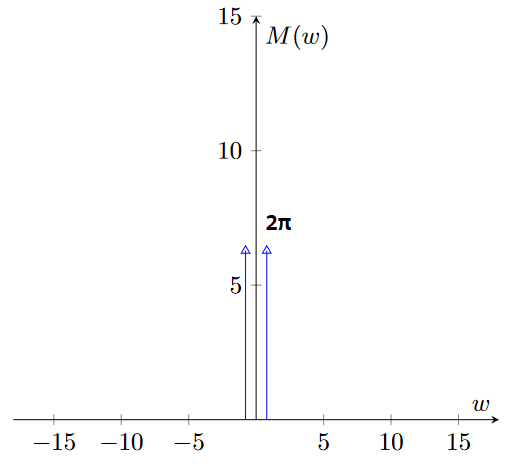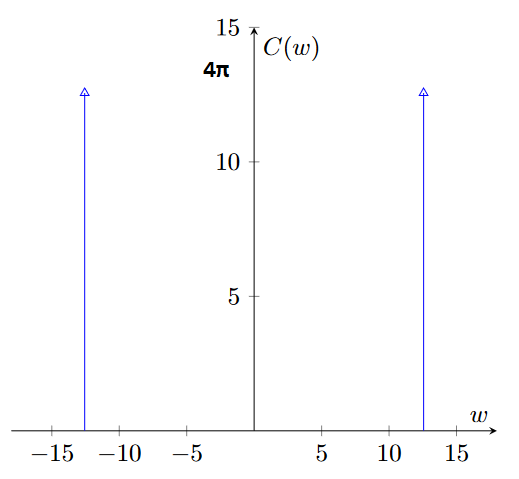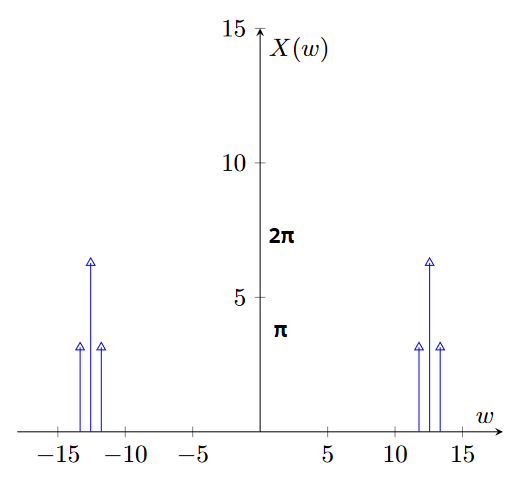